In [8]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

print(f"Shape of the data: {data.data.shape}")
print(f"Feature names: {data.feature_names}")

X = data.data
y = data.target


Shape of the data: (569, 30)
Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


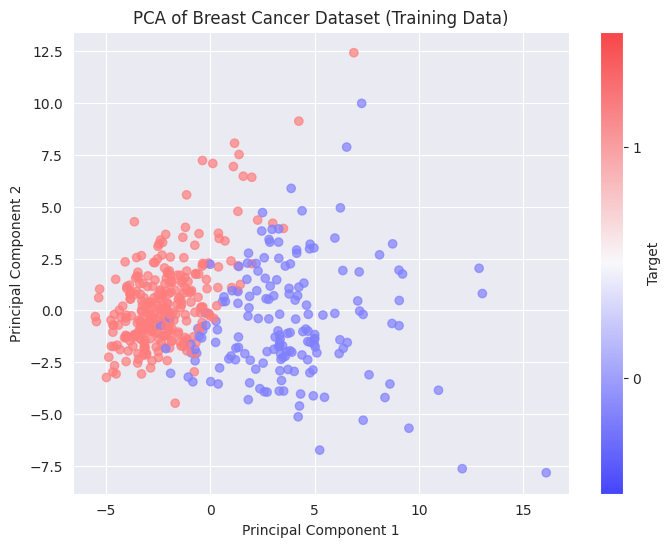

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA is dimensionality reduction technique by which we can reduce higher dimensionality data into smaller dimension called components which are eigenvectors
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Plot using y_train (not y)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='bwr', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Breast Cancer Dataset (Training Data)")
plt.colorbar(scatter, ticks=[0, 1], label='Target')
plt.clim(-0.5, 1.5)
plt.grid(True)
plt.show()


In [11]:
kernels = ['linear', 'rbf', 'poly']
results = []  # 2D list: [[kernel, train_acc, test_acc], ...]


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# for each type of kernal 1 by 1 we are running our model storing result in results list that is 2d
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train_scaled, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))

    results.append([kernel, train_acc, test_acc])


In [13]:
for res in results:
    print(f"Kernel: {res[0]} | Train Accuracy: {res[1]:.4f} | Test Accuracy: {res[2]:.4f}")


Kernel: linear | Train Accuracy: 0.9868 | Test Accuracy: 0.9561
Kernel: rbf | Train Accuracy: 0.9890 | Test Accuracy: 0.9825
Kernel: poly | Train Accuracy: 0.9143 | Test Accuracy: 0.8684


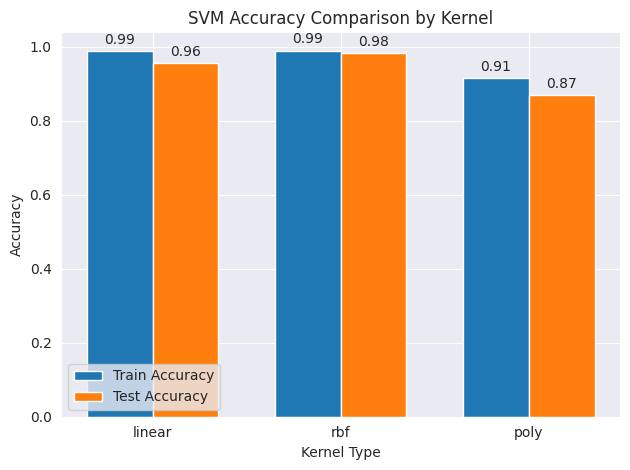

In [14]:
# plotting values from results list

import matplotlib.pyplot as plt
import numpy as np

# Assume results is your 2D list from earlier
# Example:
# results = [['linear', 0.98, 0.97], ['rbf', 0.99, 0.96], ['poly', 0.97, 0.95]]

# Extract data for plotting
kernels = [row[0] for row in results]
train_acc = [row[1] for row in results]
test_acc = [row[2] for row in results]

x = np.arange(len(kernels))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, train_acc, width, label='Train Accuracy')
bars2 = ax.bar(x + width/2, test_acc, width, label='Test Accuracy')

# Add labels and title
ax.set_ylabel('Accuracy')
ax.set_xlabel('Kernel Type')
ax.set_title('SVM Accuracy Comparison by Kernel')
ax.set_xticks(x)
ax.set_xticklabels(kernels)
ax.legend()

# Optional: Add value labels on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()
